<a href="https://colab.research.google.com/github/durnav/ML_lab-Decision_tree/blob/main/titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import scipy
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [5]:
df=pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [6]:
columns = ['Survived','Pclass','Name','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']
df = df.loc[:, columns]
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [7]:
features = ['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare' ]
X = df.loc[:,features]
Y = df.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)



In [8]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)
X_test

array([[ 0.8649009 , -1.11549655, -0.48826864, -0.45665455, -0.48334198],
       [ 0.8649009 , -1.76826488,  7.52898186,  1.9923396 ,  0.65878348],
       [-1.52661303,  1.20545752, -0.48826864, -0.45665455,  0.10434286],
       ...,
       [ 0.8649009 , -1.8407947 ,  0.51388767,  0.76784253, -0.31958669],
       [ 0.8649009 , -0.60778785, -0.48826864, -0.45665455, -0.48712217],
       [ 0.8649009 , -0.24513878,  1.51604399, -0.45665455, -0.46837856]])

In [9]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
np.set_printoptions(precision = 3)
print(rescaledX[0:5,:])

[[ 0.831 -0.529  0.43  -0.475 -0.504]
 [-1.561  0.604  0.43  -0.475  0.783]
 [ 0.831 -0.246 -0.476 -0.475 -0.49 ]
 [-1.561  0.392  0.43  -0.475  0.418]
 [ 0.831  0.392 -0.476 -0.475 -0.488]]


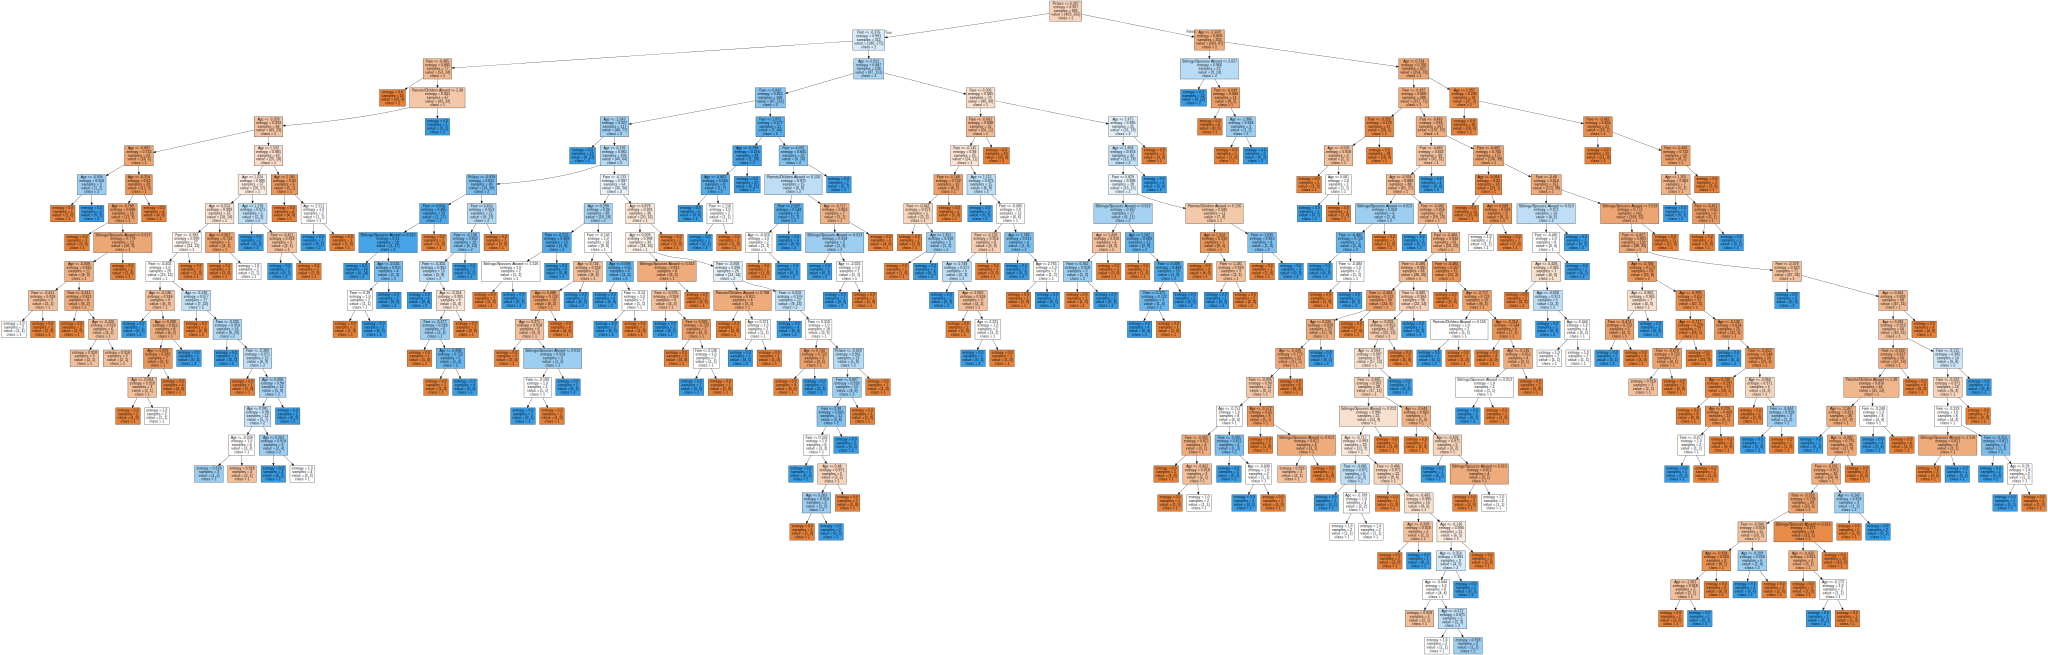

In [14]:
graphviz.Source(export_graphviz(classifier,feature_names=X.columns,filled=True,class_names=['1','2','3','4','5','6','7','8'],out_file=None))

[Text(0.4665568095599393, 0.9782608695652174, 'Pclass <= 0.267\nentropy = 0.967\nsamples = 665\nvalue = [403, 262]'),
 Text(0.24321889226100152, 0.9347826086956522, 'Fare <= -0.376\nentropy = 0.991\nsamples = 315\nvalue = [140, 175]'),
 Text(0.07663125948406677, 0.8913043478260869, 'Fare <= -0.485\nentropy = 0.895\nsamples = 77\nvalue = [53, 24]'),
 Text(0.07056145675265554, 0.8478260869565217, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.082701062215478, 0.8478260869565217, 'Parents/Children Aboard <= 1.38\nentropy = 0.941\nsamples = 67\nvalue = [43, 24]'),
 Text(0.07663125948406677, 0.8043478260869565, 'Age <= -0.209\nentropy = 0.933\nsamples = 66\nvalue = [43, 23]'),
 Text(0.024279210925644917, 0.7608695652173914, 'Age <= -0.862\nentropy = 0.755\nsamples = 23\nvalue = [18, 5]'),
 Text(0.012139605462822459, 0.717391304347826, 'Age <= -0.934\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.006069802731411229, 0.6739130434782609, 'entropy = 0.0\nsamples = 1\nvalue =

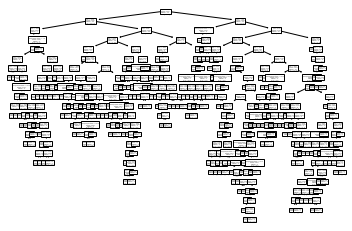

In [16]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)
tree.plot_tree(classifier, feature_names=features)



In [15]:
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[105,  37],
       [ 37,  43]])